In [394]:
import numpy as np
import random as rn
import matplotlib.pyplot as plt
%matplotlib notebook

In [395]:
x = np.linspace(0,1.0,9); print x

[ 0.     0.125  0.25   0.375  0.5    0.625  0.75   0.875  1.   ]


In [396]:
dx = x[1]-x[0]; print dx

0.125


In [397]:
D = 1.0

In [398]:
dt = dx**2/2/D / 10; print dt
nt = 10 # Number of time steps
t = dt*nt; print t

0.00078125
0.0078125


In [399]:
C = (dt * D) / (dx**2); print C # For constants in "propagate" function 

0.05


In [400]:
# Starting f(t,x) as 2-D array of random numbers; pseudo: f[time][x]; n = 0 row stores initial field

f = np.array([[rn.random() for i in range(len(x))] for j in range(int(t/dt)+1)]); print f; # Adding a time row to include intial field

[[ 0.42721549  0.2966524   0.24331191  0.17750372  0.02130836  0.54125522
   0.78532489  0.78913294  0.20654643]
 [ 0.77339161  0.16835863  0.53839558  0.00355494  0.03619156  0.42062838
   0.5595197   0.97970729  0.2116695 ]
 [ 0.80262696  0.63342622  0.74368702  0.3706885   0.73304995  0.33602915
   0.24730081  0.29141732  0.46456651]
 [ 0.35156153  0.23239118  0.91514029  0.48558799  0.87994139  0.9880854
   0.49805809  0.30824155  0.47851916]
 [ 0.5489278   0.24959379  0.98365178  0.56181392  0.98197438  0.26741473
   0.8062015   0.36572985  0.59660116]
 [ 0.18155801  0.58807767  0.41464494  0.27141337  0.82445787  0.23528021
   0.42794766  0.22096726  0.82335235]
 [ 0.37325573  0.27152781  0.16565225  0.22892491  0.80713852  0.0446785
   0.83935648  0.57395522  0.89398549]
 [ 0.47573305  0.52816693  0.32576255  0.93847984  0.8784511   0.79180155
   0.94714287  0.9959612   0.49056447]
 [ 0.02349968  0.51061665  0.56394586  0.71396441  0.44214465  0.59703557
   0.70038774  0.6131660

In [401]:
propagate(f,nt)

array([[ 0.42721549,  0.2966524 ,  0.24331191,  0.17750372,  0.02130836,
         0.54125522,  0.78532489,  0.78913294,  0.20654643],
       [ 0.40965389,  0.30051353,  0.24268853,  0.17298436,  0.05511547,
         0.52746136,  0.77331181,  0.75981321,  0.24670921],
       [ 0.39604963,  0.30307929,  0.24209457,  0.17057613,  0.08462621,
         0.51613659,  0.76034436,  0.73483294,  0.28051164],
       [ 0.38562422,  0.30467858,  0.24156788,  0.16985455,  0.11049922,
         0.50677146,  0.7468584 ,  0.71339245,  0.3090046 ],
       [ 0.37774596,  0.30557032,  0.24113775,  0.17047245,  0.1332806 ,
         0.4989622 ,  0.73318076,  0.69484636,  0.33305498],
       [ 0.37190262,  0.30595748,  0.24082611,  0.17214613,  0.15342427,
         0.49238904,  0.71955311,  0.67867351,  0.3533791 ],
       [ 0.36767919,  0.30599817,  0.24064868,  0.17464403,  0.17130861,
         0.48679901,  0.70615093,  0.66445277,  0.37056999],
       [ 0.36473968,  0.30581474,  0.24061592,  0.17777749,  0

In [402]:
# Function that iterates diffusion values through number of time steps
def propagate(f, nt):
    # nt = len(f) - 1 # not including initial field in number of time steps
    # print nt
    for n in range(0, nt) :
        for k in range(0, len(x)):
            f_pre = f[n][k] 
            if k == 0:
                f[n+1][k] = C * ( f[n][len(x)-1] - 2*f_pre + f[n][k+1] ) + f_pre
                # print 'hi'

            elif k == (len(x) - 1):
                f[n+1][k] = C * ( f[n][k-1] - 2*f_pre + f[n][0] ) + f_pre
                # print'hello'
            else:
                f[n+1][k] = C * ( f[n][k-1] - 2*f_pre + f[n][k+1] ) + f_pre
                # print 'hey'
                
    return f

<IPython.core.display.Javascript object>


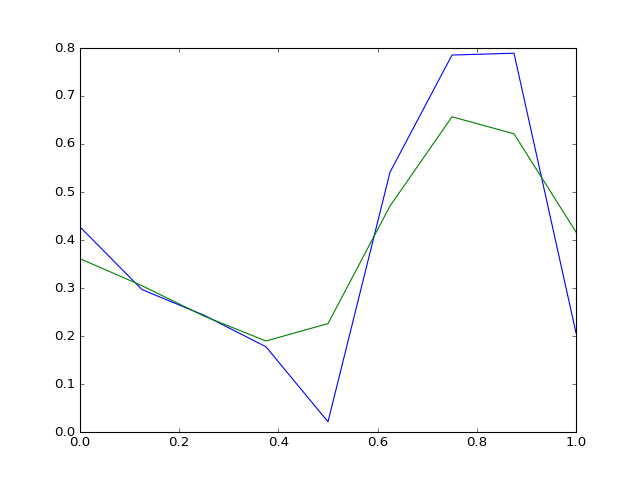

In [403]:
plt.plot(x,f[0])
plt.plot(x,f[-1])